<a href="https://colab.research.google.com/github/Ujjwal1khadka/models/blob/master/Lets_Grow_More.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
#Dropping unnecessary columns
df = df.drop('Id', axis=1)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [13]:
#Analysing the data
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

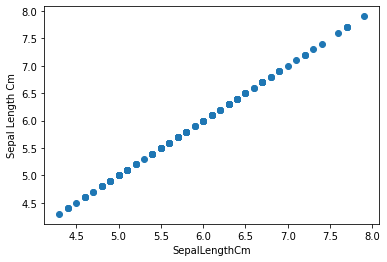

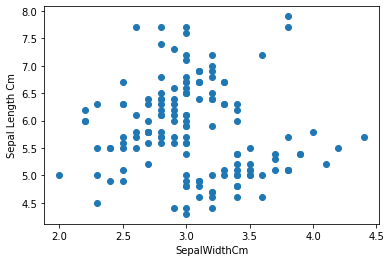

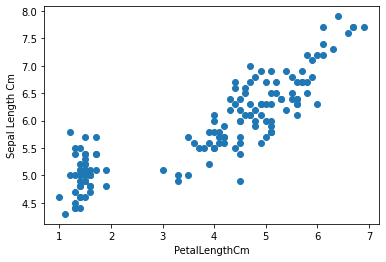

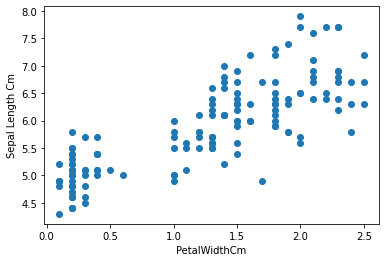

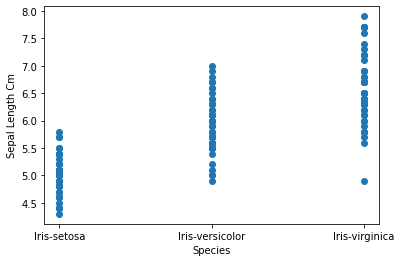

In [14]:
for i in df.columns:
    plt.scatter(df[str(i)],df['SepalLengthCm'])
    plt.xlabel(i)
    plt.ylabel("Sepal Length Cm")
    plt.show()

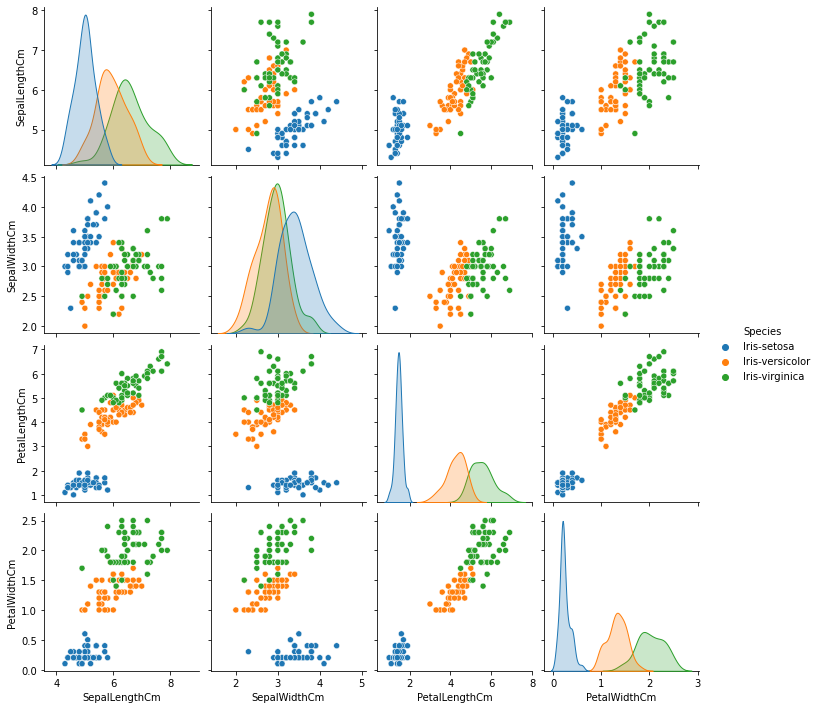

In [16]:
#Conclusion: The plot doesnot convey much information about the nature of distribution of the sepal length vs sepal width. 
#Hence, we would use different colours(based on their class type) to interpret the distribution nature.
sns.pairplot(df, hue ='Species')

#Iris-Setosa can be easily differentiated
#Iris-Versicolor and Iris-Virginica are overlaping in most of the plot, making it difficult for us to differentiate
#The graph of Petal Length vs Petal Width shows us the best result that can be used to segregate Iris-Versicolor and Iris-Virginica

In [17]:
#Correlation Between the numeric variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


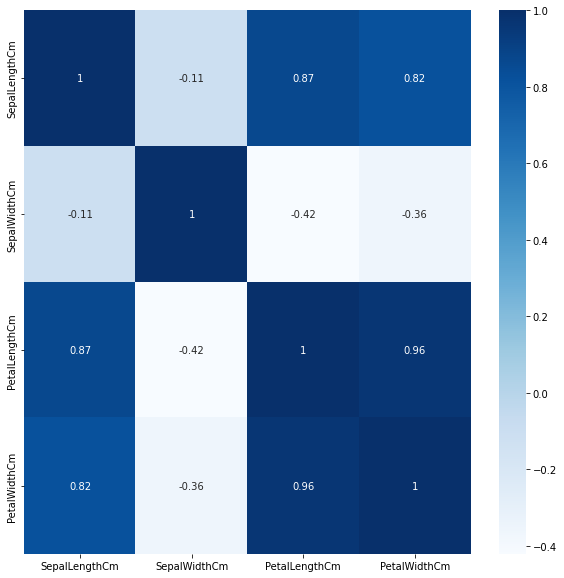

In [18]:
#Plotting the correlation using a heatmap

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap='Blues',annot = True)

#From the graph, it can be clearly seen that the columns Petal length and petal width hold a strong correlation (=0.96). Earlier we had got the same observations while plotting a pairplot.
#Apart from this, the columns Sepal length and Petal length also hold a high corelation(=0.87).
#Sepal length and Petal width alzo hold a good correlation (=0.82).

In [19]:
#Observing the distribution nature of all the 4 columns (Using a Distplot)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

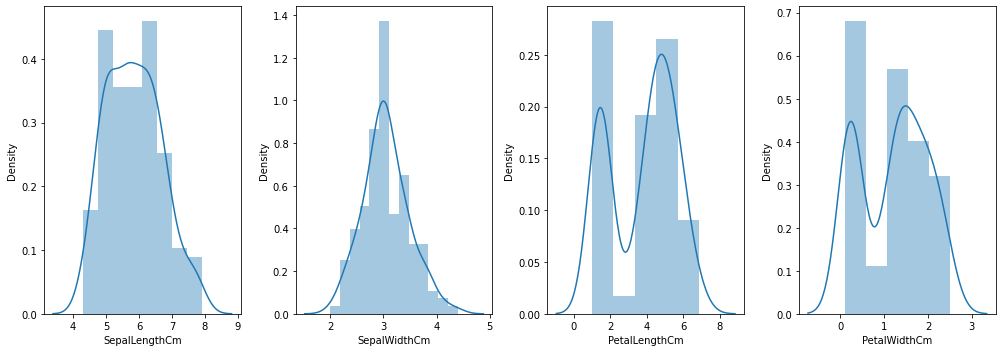

In [20]:
col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(35,5))
i = 1
for e in col:
    plt.subplot(1,10,i)
    sns.distplot(df[e])
    i = i + 1
plt.tight_layout()
plt.show()

In [21]:
#Conclusion:It can be observed from the above distplots that the distribution of the columns follow a Normal distribution


In [23]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


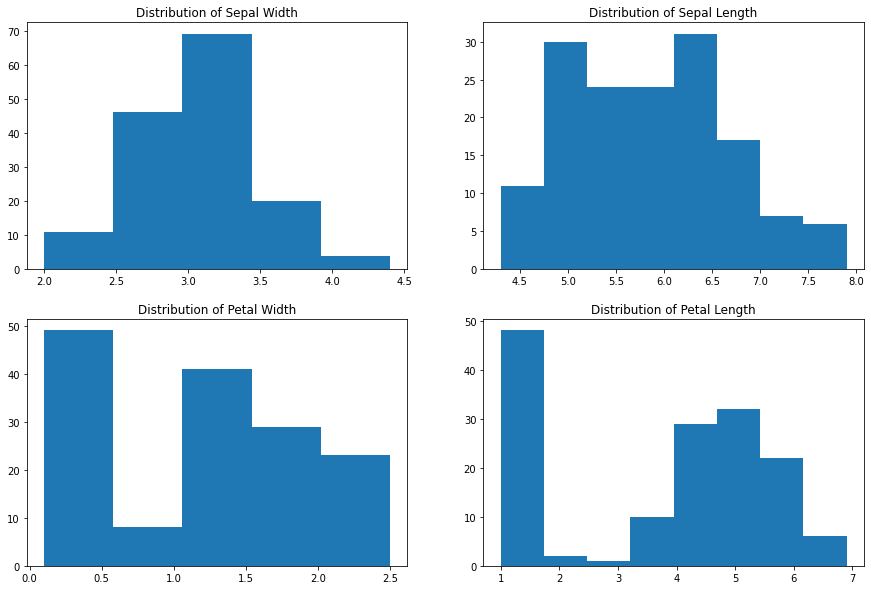

In [24]:
#Bin size of histogram
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['SepalLengthCm'], bins=8);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['PetalLengthCm'], bins=8)
plt.show()

In [25]:
#The highest frequency of Sepal length ranges between 6.0 - 6.5 which is around 32
#The highest frequency of Sepal Width ranges between 3.0 - 3.5 which is around 69
#The highest frequency of Petal length ranges between 1.0 - 1.8 which is around 50
#The highest frequency of Petal Width ranges between 0.0 - 0.5 which is around 50

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

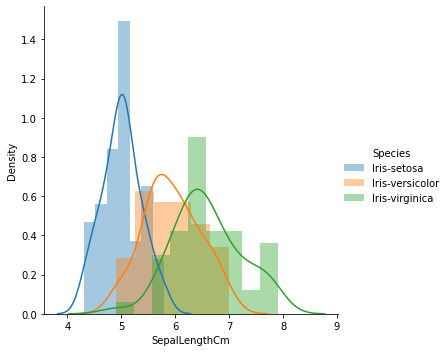

In [26]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend()

In [27]:
#Conclusion:
#It can be clearly seen that the flower species cannot be seperated based on the Sepal length as the values overlap a lot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

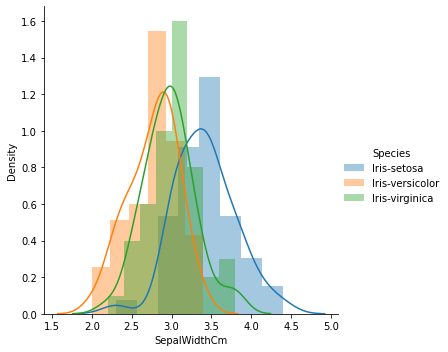

In [28]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

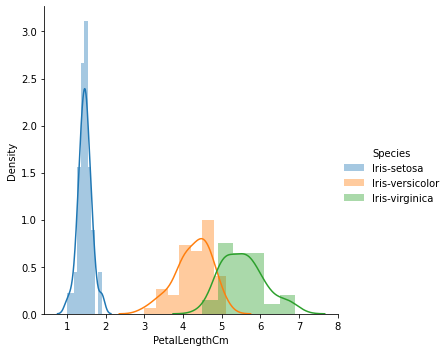

In [29]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

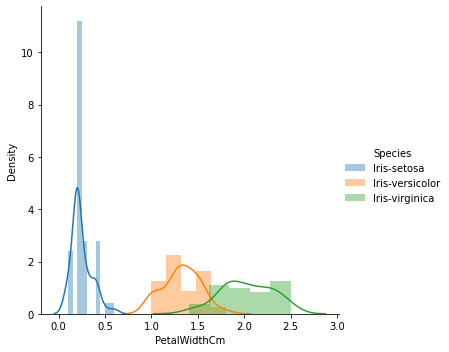

In [30]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend()

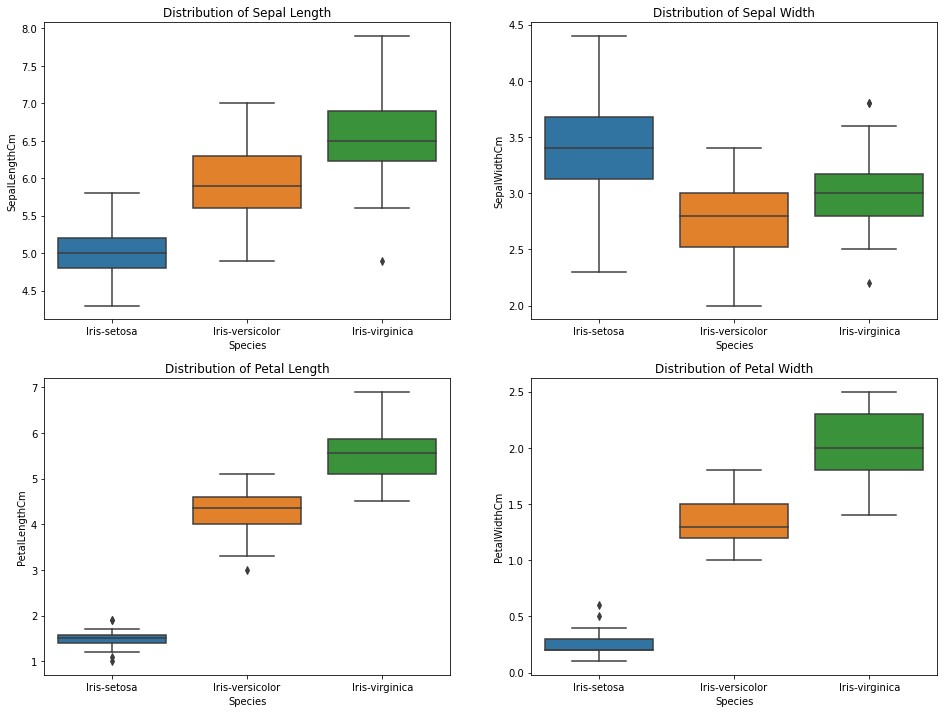

In [31]:
#From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 1.5-2.0).
# The column Petal Width can also be used to seperate the species .
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.boxplot(y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.boxplot(y="SepalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.boxplot(y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.boxplot(y="PetalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

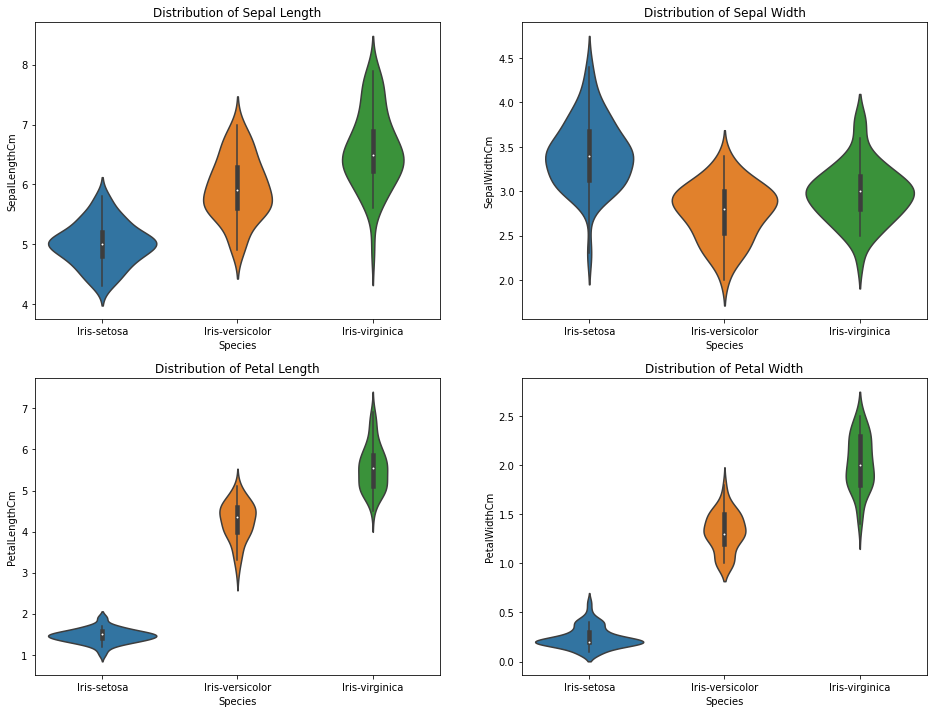

In [32]:
#Let's Dive a lil Deeper !!
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.violinplot(y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.violinplot(y="SepalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.violinplot(y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.violinplot(y="PetalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

In [33]:
#Final Conclusions
#The dataset is completely balanced i.e. equal number of records are present for each of the three species.
#Here our target column is Species, as we need to segregate the flowers as per their species based on the 4 fetaures namely, Sepal Length, Sepal Width, Petal Length and Petal Width .
#The columns Petal length and petal width hold a strong correlation (=0.96) and can be used to segregate the flowers.
#By plotting various graphs, we can conclude that:
#The Setosa species is easily segregable because of its small feature value range.
#The Versicolor and Virginca species are a bit difficult to seperate because they overlap at many points in terms of their features.